In [ ]:
!wget --header 'Host: datahack-prod.s3.amazonaws.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:87.0) Gecko/20100101 Firefox/87.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'Upgrade-Insecure-Requests: 1' 'https://datahack-prod.s3.amazonaws.com/test_file/test_mSzZ8RL.csv' --output-document 'test_mSzZ8RL.csv'
!wget --header 'Host: datahack-prod.s3.amazonaws.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:87.0) Gecko/20100101 Firefox/87.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'Upgrade-Insecure-Requests: 1' 'https://datahack-prod.s3.amazonaws.com/train_file/train_s3TEQDk.csv' --output-document 'train_s3TEQDk.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#**EDA**

In [5]:
train_data=pd.read_csv('/content/train_s3TEQDk.csv')
test_data=pd.read_csv('/content/test_mSzZ8RL.csv')

In [6]:
train_data.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


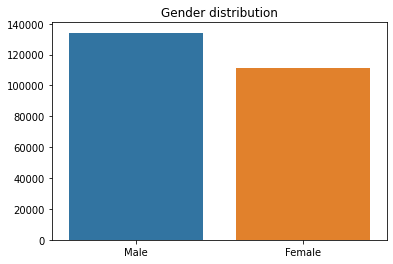

In [16]:
plt.title('Gender distribution')
sns.barplot(train_data.Gender.value_counts().index,train_data.Gender.value_counts().values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


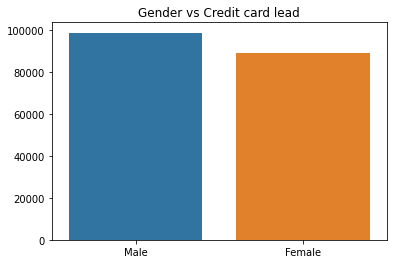

In [13]:
plt.title('Gender vs Credit card lead')
sns.barplot(train_data[train_data.Is_Lead==0].Gender.value_counts().index,train_data[train_data.Is_Lead==0].Gender.value_counts().values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


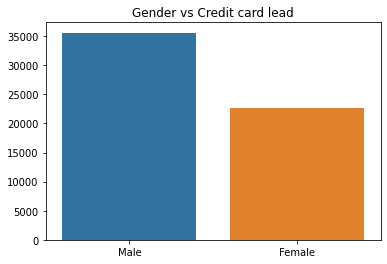

In [14]:
plt.title('Gender vs Credit card lead')
sns.barplot(train_data[train_data.Is_Lead==1].Gender.value_counts().index,train_data[train_data.Is_Lead==1].Gender.value_counts().values)
plt.show()

For females we see credit card lead is slightly less in comparison to males

Age

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


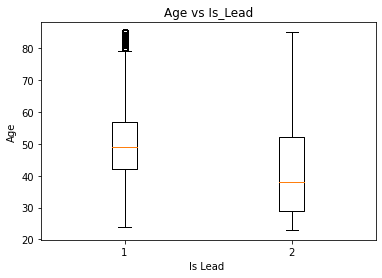

In [23]:
plt.boxplot([train_data[train_data.Is_Lead==1].Age,train_data[train_data.Is_Lead==0].Age])
plt.title('Age vs Is_Lead')
plt.xlabel('Is Lead ')
plt.ylabel('Age')
plt.show()

Region Code

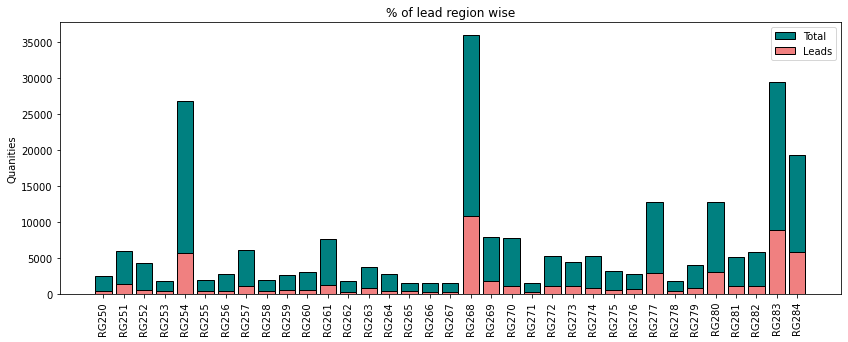

In [28]:
temp1=train_data.groupby('Region_Code')['Is_Lead'].agg(lambda x:x.eq(1).sum()).reset_index() #aggregates state wis
temp2=train_data.groupby('Region_Code')['Is_Lead'].agg(lambda x:x.eq(0).sum()).reset_index()
temp3=temp1['Is_Lead']+temp2['Is_Lead']
plt.figure(figsize=(14,5))
plt.title('Region_Code vs Is_lead')
p1=plt.bar(temp1['Region_Code'],temp3,edgecolor='black',color='teal')
p2=plt.bar(temp1['Region_Code'],temp1['Is_Lead'],edgecolor='black',color='lightcoral')
plt.ylabel('Quanities')
plt.title('% of lead region wise')
plt.xticks(temp1['Region_Code'], list(temp1['Region_Code'].values),rotation=90)
plt.legend((p1[0], p2[0]), ('Total', 'Leads'))
plt.show()

Occupation

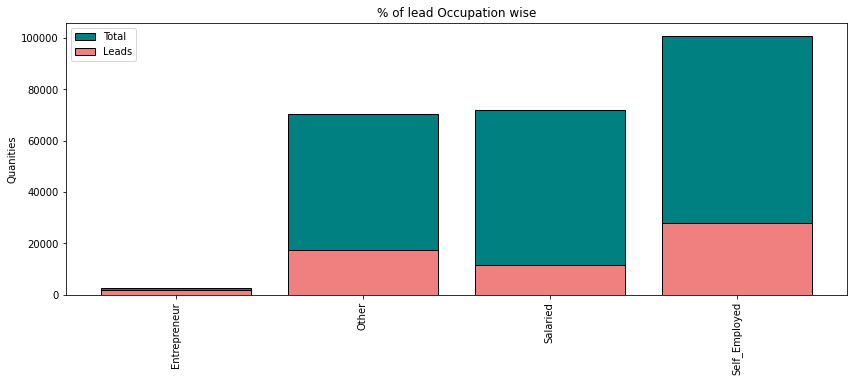

In [29]:
temp1=train_data.groupby('Occupation')['Is_Lead'].agg(lambda x:x.eq(1).sum()).reset_index() #aggregates state wis
temp2=train_data.groupby('Occupation')['Is_Lead'].agg(lambda x:x.eq(0).sum()).reset_index()
temp3=temp1['Is_Lead']+temp2['Is_Lead']
plt.figure(figsize=(14,5))
plt.title('Occupation vs Is_lead')
p1=plt.bar(temp1['Occupation'],temp3,edgecolor='black',color='teal')
p2=plt.bar(temp1['Occupation'],temp1['Is_Lead'],edgecolor='black',color='lightcoral')
plt.ylabel('Quanities')
plt.title('% of lead Occupation wise')
plt.xticks(temp1['Occupation'], list(temp1['Occupation'].values),rotation=90)
plt.legend((p1[0], p2[0]), ('Total', 'Leads'))
plt.show()

All entrepreneurs use credit cards..

Channel code

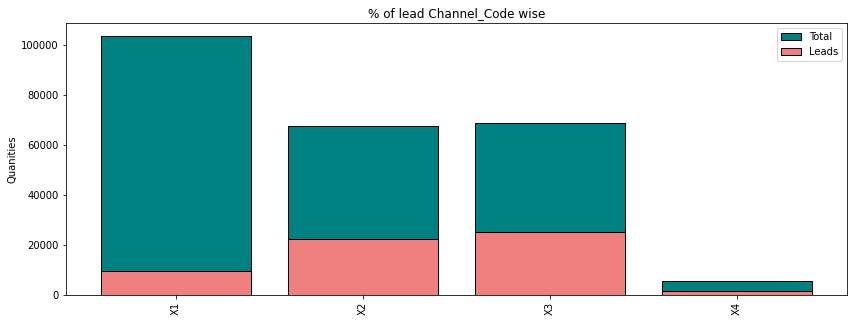

In [31]:
temp1=train_data.groupby('Channel_Code')['Is_Lead'].agg(lambda x:x.eq(1).sum()).reset_index() #aggregates state wis
temp2=train_data.groupby('Channel_Code')['Is_Lead'].agg(lambda x:x.eq(0).sum()).reset_index()
temp3=temp1['Is_Lead']+temp2['Is_Lead']
plt.figure(figsize=(14,5))
plt.title('Channel_Code vs Is_lead')
p1=plt.bar(temp1['Channel_Code'],temp3,edgecolor='black',color='teal')
p2=plt.bar(temp1['Channel_Code'],temp1['Is_Lead'],edgecolor='black',color='lightcoral')
plt.ylabel('Quanities')
plt.title('% of lead Channel_Code wise')
plt.xticks(temp1['Channel_Code'], list(temp1['Channel_Code'].values),rotation=90)
plt.legend((p1[0], p2[0]), ('Total', 'Leads'))
plt.show()

Vintage

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


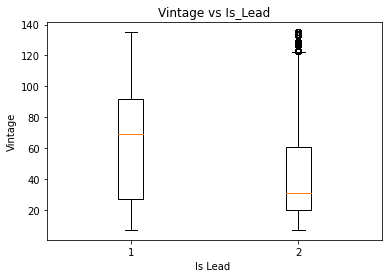

In [40]:
plt.boxplot([train_data[train_data.Is_Lead==1].Vintage,train_data[train_data.Is_Lead==0].Vintage])
plt.title('Vintage vs Is_Lead')
plt.xlabel('Is Lead ')
plt.ylabel('Vintage')
plt.show()

Average Account Balance

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


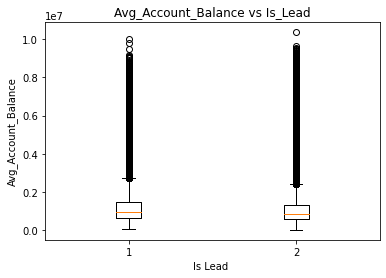

In [33]:
plt.boxplot([train_data[train_data.Is_Lead==1].Avg_Account_Balance,train_data[train_data.Is_Lead==0].Avg_Account_Balance])
plt.title('Avg_Account_Balance vs Is_Lead')
plt.xlabel('Is Lead ')
plt.ylabel('Avg_Account_Balance')
plt.show()

Is active

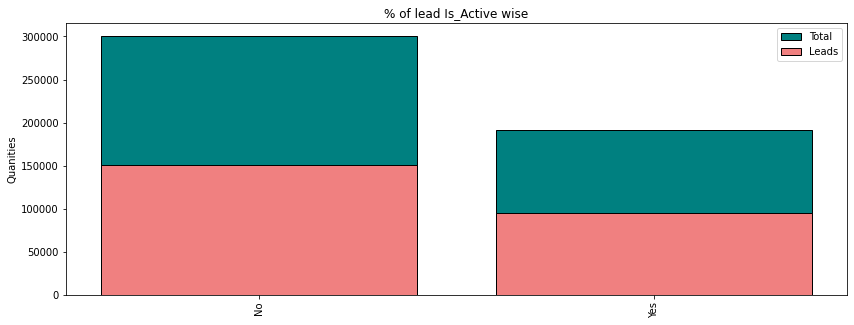

In [35]:
temp1=train_data.groupby('Is_Active')['Is_Lead'].agg(lambda x:x.eq('Yes').count()).reset_index() #aggregates state wis
temp2=train_data.groupby('Is_Active')['Is_Lead'].agg(lambda x:x.eq('No').count()).reset_index()
temp3=temp1['Is_Lead']+temp2['Is_Lead']
plt.figure(figsize=(14,5))
plt.title('Is_Active vs Is_lead')
p1=plt.bar(temp1['Is_Active'],temp3,edgecolor='black',color='teal')
p2=plt.bar(temp1['Is_Active'],temp1['Is_Lead'],edgecolor='black',color='lightcoral')
plt.ylabel('Quanities')
plt.title('% of lead Is_Active wise')
plt.xticks(temp1['Is_Active'], list(temp1['Is_Active'].values),rotation=90)
plt.legend((p1[0], p2[0]), ('Total', 'Leads'))
plt.show()

Credit product

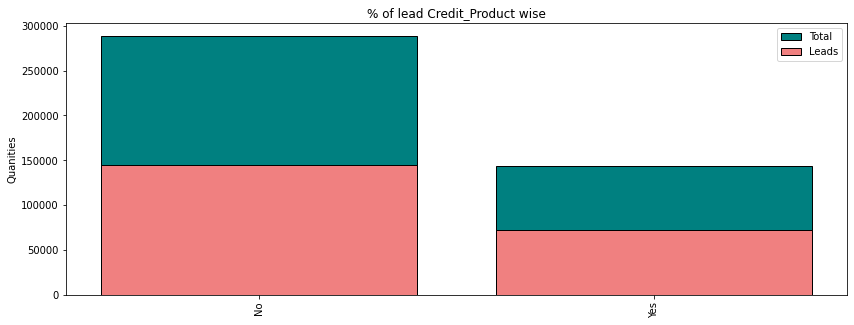

In [43]:
temp1=train_data.groupby('Credit_Product')['Is_Lead'].agg(lambda x:x.eq('Yes').count()).reset_index() #aggregates state wis
temp2=train_data.groupby('Credit_Product')['Is_Lead'].agg(lambda x:x.eq('No').count()).reset_index()
temp3=temp1['Is_Lead']+temp2['Is_Lead']
plt.figure(figsize=(14,5))
plt.title('Credit_Product 	 vs Is_lead')
p1=plt.bar(temp1['Credit_Product'],temp3,edgecolor='black',color='teal')
p2=plt.bar(temp1['Credit_Product'],temp1['Is_Lead'],edgecolor='black',color='lightcoral')
plt.ylabel('Quanities')
plt.title('% of lead Credit_Product wise')
plt.xticks(temp1['Credit_Product'], list(temp1['Credit_Product'].values),rotation=90)
plt.legend((p1[0], p2[0]), ('Total', 'Leads'))
plt.show()

#**Preprocessing**

In [84]:
ID=test_data['ID']

In [85]:
#label coding Gender
train_data['Gender']=train_data.Gender.map({'Female':0,'Male':1})
test_data['Gender']=test_data.Gender.map({'Female':0,'Male':1})

In [86]:
train_data['Credit_Product']=train_data.Credit_Product.map({'No':0,'Yes':1})
test_data['Credit_Product']=test_data.Credit_Product.map({'No':0,'Yes':1})

In [87]:
train_data['Is_Active']=train_data.Is_Active.map({'No':0,'Yes':1})
test_data['Is_Active']=test_data.Is_Active.map({'No':0,'Yes':1})

In [90]:
ohe=OneHotEncoder()
Occ_ohe_tr=ohe.fit_transform(np.array(train_data.Occupation).reshape(-1,1)).toarray()
Occ_ohe_te=ohe.transform(np.array(test_data.Occupation).reshape(-1,1)).toarray()
Occ_tr=pd.DataFrame(Occ_ohe_tr)
Occ_tr.columns=['Occ'+str(i) for i in Occ_tr.columns]
Occ_te=pd.DataFrame(Occ_ohe_te)
Occ_te.columns=['Occ'+str(i) for i in Occ_te.columns]

In [91]:
ohe=OneHotEncoder()
Chnl_code_ohe_tr=ohe.fit_transform(np.array(train_data.Channel_Code).reshape(-1,1)).toarray()
Chnl_code_ohe_te=ohe.transform(np.array(test_data.Channel_Code).reshape(-1,1)).toarray()
Chnl_code_tr=pd.DataFrame(Chnl_code_ohe_tr)
Chnl_code_tr.columns=['Chnl'+str(i) for i in Chnl_code_tr.columns]
Chnl_code_te=pd.DataFrame(Chnl_code_ohe_te)
Chnl_code_te.columns=['Chnl'+str(i) for i in Chnl_code_te.columns]

In [92]:
train_data.drop(['ID','Occupation','Channel_Code'],axis=1,inplace=True)
test_data.drop(['ID','Occupation','Channel_Code'],axis=1,inplace=True)

In [93]:
#engineered feature
nan_pres_tr=train_data.Credit_Product.isna()
nan_pres_te=test_data.Credit_Product.isna()
train_data['Credit_nan']=1*nan_pres_tr
test_data['Credit_nan']=1*nan_pres_te

In [94]:
cp_tr=train_data[train_data.Credit_Product.notna()]
cp_te=train_data[train_data.Credit_Product.isna()]
y_cp_tr=cp_tr['Credit_Product']
cp_tr.drop('Credit_Product',axis=1,inplace=True)
cp_te.drop('Credit_Product',axis=1,inplace=True)
cp_tr.drop('Region_Code',axis=1,inplace=True)
cp_te.drop('Region_Code',axis=1,inplace=True)
cp_tr.drop('Is_Lead',axis=1,inplace=True)
cp_te.drop('Is_Lead',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Doing a model based imputation of NaNs

In [95]:
xcp_tr,xcp_te,ycp_tr,ycp_te=train_test_split(cp_tr,y_cp_tr,test_size=0.2,random_state=5)

In [96]:
clf=XGBClassifier(n_estimators=1000)
clf.fit(xcp_tr,ycp_tr)
clf.score(xcp_te,ycp_te)

0.7134704251386321

In [97]:
y_cp_te=clf.predict(cp_te)

In [98]:
loc=train_data[train_data.Credit_Product.isna()]['Credit_Product'].index

In [99]:
train_data.Credit_Product.loc[loc]=y_cp_te

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
test_cp=test_data[test_data.Credit_Product.isna()]
test_cp.drop(['Credit_Product','Region_Code'],axis=1,inplace=True)
y_cp_test=clf.predict(test_cp)

In [ ]:
loc=test_data[test_data.Credit_Product.isna()]['Credit_Product'].index
test_data.Credit_Product.loc[loc]=y_cp_test

In [102]:
train_y=train_data.Is_Lead
train_data.drop('Is_Lead',axis=1,inplace=True)

In [103]:
train_merge=pd.concat([train_data,Chnl_code_tr,Occ_tr],axis=1)
test_merge=pd.concat([test_data,Chnl_code_te,Occ_te],axis=1)

In [105]:
train_merge.drop(['Gender','Avg_Account_Balance'],axis=1,inplace=True)
test_merge.drop(['Gender','Avg_Account_Balance'],axis=1,inplace=True)

#**Modelling**

In [106]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(train_merge,train_y,test_size=0.2)

In [107]:
#Response coding categorial feature region code
def response_coder(X_train_X):
    '''This function predicts probability of categorical data in a column for each class'''
    sch_dict=dict()
    for i in X_train['Region_Code'].unique():
      den=X_train_X['Region_Code'][X_train_X['Region_Code']==i].count()
      nu=X_train_X[X_train_X['Region_Code']==i]
      num0=nu['Region_Code'][nu['Y']==0].count()
      num1=nu['Region_Code'][nu['Y']==1].count()
      sch_dict[i]=num0/den,num1/den
    return sch_dict

In [108]:
X_train_X=X_train.copy()
X_train_X['Y']=y_train

In [109]:
#vectorizing categorical features :Regionalcode
Reg_zero=[]
Reg_ones=[]
Reg_zero_te=[]
Reg_ones_te=[]
school_dict=response_coder(X_train_X)
for i in X_train['Region_Code']:
  Reg_zero.append(school_dict.get(i)[0])
  Reg_ones.append(school_dict.get(i)[1])
print('Response coding done...')
for i in X_test['Region_Code']:
  if i in school_dict.keys():
    Reg_zero_te.append(school_dict.get(i)[0])
    Reg_ones_te.append(school_dict.get(i)[1])
  else:
    Reg_zero_te.append(0.5)
    Reg_ones_te.append(0.5)

Response coding done...


In [110]:
Reg_zero_test=[]
Reg_ones_test=[]
for i in test_merge['Region_Code']:
  if i in school_dict.keys():
    Reg_zero_test.append(school_dict.get(i)[0])
    Reg_ones_test.append(school_dict.get(i)[1])
  else:
    Reg_zero_test.append(0.5)
    Reg_ones_test.append(0.5)

In [111]:
test_merge['Reg1']=Reg_ones_test
test_merge['Reg0']=Reg_zero_test
test_merge.drop('Region_Code',axis=1,inplace=True)

In [ ]:
X_train['Reg1']=Reg_ones
X_train['Reg0']=Reg_zero
X_test['Reg1']=Reg_ones_te
X_test['Reg0']=Reg_zero_te
X_train.drop(['Region_Code'],axis=1,inplace=True)
X_test.drop('Region_Code',axis=1,inplace=True)

In [113]:
undersample = RandomOverSampler(sampling_strategy='minority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    A =(((C.T)/(C.sum(axis=1))).T)    
    B =(C/C.sum(axis=0))
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Random Forest

log_loss for c =  250 is 0.8701729324843331
log_loss for c =  500 is 0.8701097643380595
log_loss for c =  1000 is 0.8700741657690005
log_loss for c =  115 is 0.8700922197689895


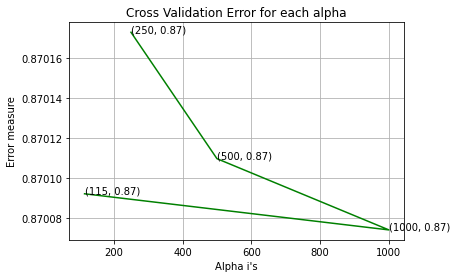

For values of best alpha =  250 The train log loss is: 0.8704458036727161
For values of best alpha =  250 The test log loss is: 0.8696082648989103
Number of misclassified points  14.290365245701494
-------------------------------------------------- Confusion matrix --------------------------------------------------


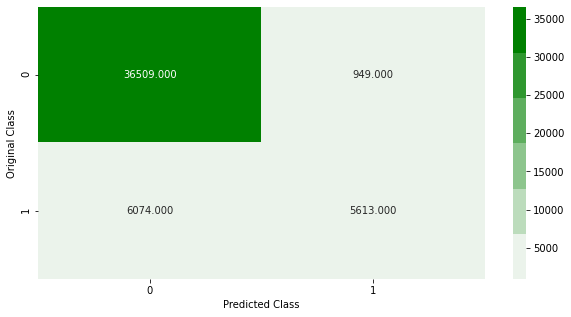

-------------------------------------------------- Precision matrix --------------------------------------------------


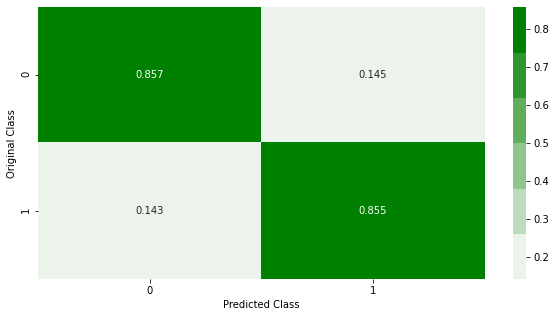

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


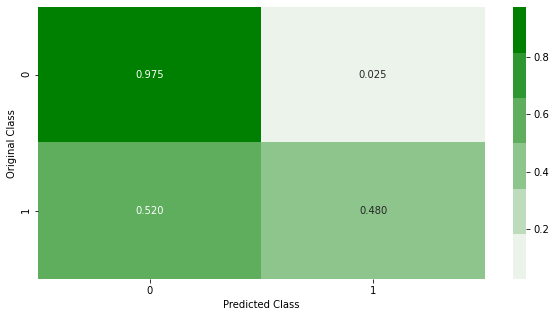

Sum of rows in precision matrix [1. 1.]


In [ ]:
#Random forest classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
alpha=[250,500,1000,115]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1,min_samples_split=10,max_depth=7,class_weight='balanced')
    r_cfl.fit(X_train,y_train)
    predict_y = r_cfl.predict_proba(X_train)
    cv_log_error_array.append(roc_auc_score(y_train, predict_y[:,1]))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1,min_samples_split=10,max_depth=7)
r_cfl.fit(X_train,y_train)

predict_y = r_cfl.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",roc_auc_score(y_train, predict_y[:,
predict_y = r_cfl.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",roc_auc_score(y_test, predict_y[:,1]))
plot_confusion_matrix(y_test, r_cfl.predict(X_test))

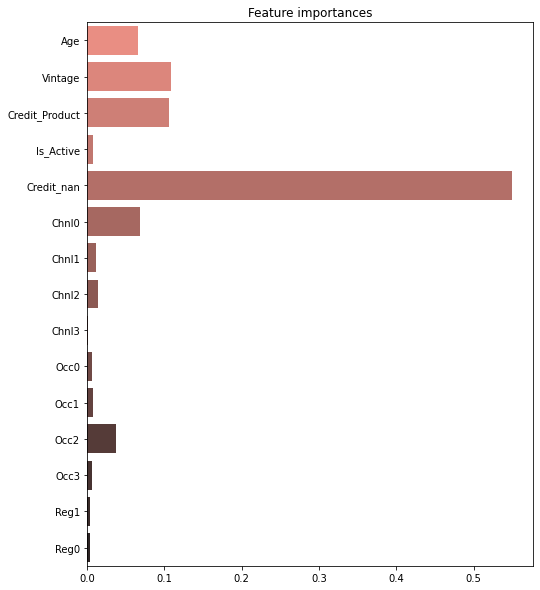

In [ ]:
features=X_train.columns
coef = pd.Series(r_cfl.feature_importances_,features).sort_values()
plt.figure(figsize=(8,10))
plt.title('Feature importances')
sns.barplot(x=r_cfl.feature_importances_,y=features,palette='dark:salmon_r')
plt.show()

XGBoost

For values of best alpha =  2000 The train log loss is: 0.8808372794442203
For values of best alpha =  2000 The test log loss is: 0.874251207554807
Number of misclassified points  13.92003255671991
-------------------------------------------------- Confusion matrix --------------------------------------------------


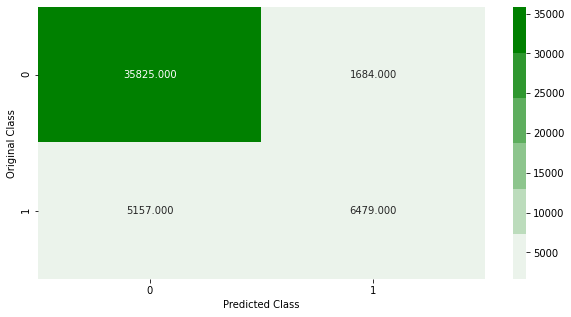

-------------------------------------------------- Precision matrix --------------------------------------------------


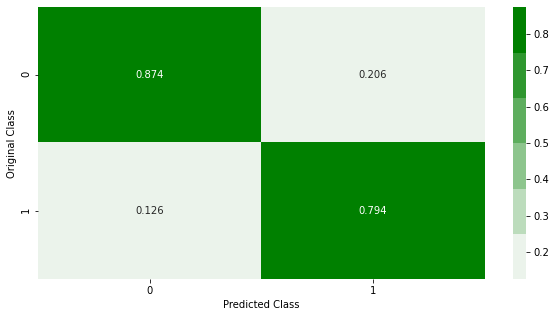

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


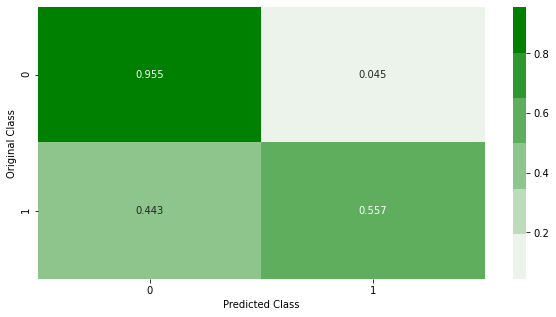

Sum of rows in precision matrix [1. 1.]


In [40]:
#XGboost
alpha=[500,1000,2000]
cv_log_error_array=[]
train_log_error_array=[]
for i in alpha:
    r_cfl=XGBClassifier(n_estimators=i,nthread=-1,subsample=0.8,colsample_bylevel=0.8,colsample_bynode=0.6)
    r_cfl.fit(X_train,y_train)
    predict_y = r_cfl.predict_proba(X_train)
    cv_log_error_array.append(roc_auc_score(y_train, predict_y[:,1]))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=XGBClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = r_cfl.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = r_cfl.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",roc_auc_score(y_test, predict_y[:,1]))
plot_confusion_matrix(y_test, r_cfl.predict(X_test))

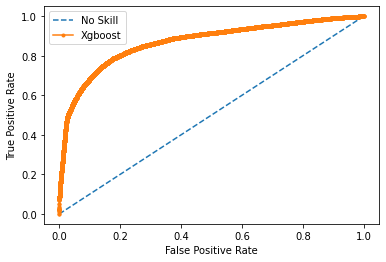

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predict_y[:,1])
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Xgboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [54]:
x_cfl=XGBClassifier(nthread=-1)
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,200,500,1000,2000],
'max_depth':[3,5,10,13],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 82.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 95.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 97.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 98.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=-1,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
#Using best parameters
r_cfl=XGBClassifier(n_estimators=100,random_state=42,n_jobs=-1,colsample_bytree= .5, learning_rate= 0.15, max_depth= 5,subsample= 1)
r_cfl.fit(X_train,y_train)
predict_y = r_cfl.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = r_cfl.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",roc_auc_score(y_test, predict_y[:,1]))

For values of best alpha =  2000 The train log loss is: 0.8781640231975774
For values of best alpha =  2000 The test log loss is: 0.874769013706292


#**For submission**

In [51]:
y=r_cfl.predict_proba(test_merge)

In [52]:
y=pd.DataFrame(y[:,1])
y=pd.concat([ID,y],axis=1)
y.columns=['ID','Is_Lead']
y.to_csv('xgboost_ultimatebest.csv',index=None)

In [53]:
y

,ID,Is_Lead
0,VBENBARO,0.036904
1,CCMEWNKY,0.870731
2,VK3KGA9M,0.061524
3,TT8RPZVC,0.024009
4,SHQZEYTZ,0.023288
...,...,...
105307,DBENJOYI,0.988340
105308,CWQ72DWS,0.556661
105309,HDESC8GU,0.072785
105310,2PW4SFCA,0.219891
